In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf


In [4]:
%matplotlib inline

In [14]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\chris\anaconda3\python.exe
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


In [7]:
package_list = ['pandas', 'numpy', 'lPython', 'seaborn', 'sklearn', 'matplotlib', 'statsmodels']
for pack in package_list:
    statement = 'import' + pack
    exec(statement)
    print("%s : %s" % (pack, eval(pack)._version_))

NameError: name 'importpandas' is not defined

In [8]:
import os
print(os.getcwd())

C:\Users\chris


In [9]:
Boston = pd.read_table("Boston.csv", sep=",") #pandas package를 이용하여 데이터를 읽음

In [10]:
Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
str(Boston)
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
Boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
Boston.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [24]:
pd.isnull(Boston)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
pd.isnull(Boston).sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [27]:
 Boston.notnull().sum() #isnull과 정반대의 기능을 함

Unnamed: 0    506
crim          506
zn            506
indus         506
chas          506
nox           506
rm            506
age           506
dis           506
rad           506
tax           506
ptratio       506
black         506
lstat         506
medv          506
dtype: int64

In [28]:
Boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'rows'

In [31]:
lm_fit = smf.ols(formula='medv ~ lstat', data = Boston).fit()

In [32]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 03 May 2020   Prob (F-statistic):           5.08e-88
Time:                        17:39:15   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
lm_fit.resid.describe()

count    5.060000e+02
mean    -2.066682e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

In [37]:
lm_fit.conf_int(alpha=0.05) #유의수준이 0.05이므로 95% confidence interval. 

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [38]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_new = pd.DataFrame({'lstat':[5,10,15]})
lm_fit.predict(X_new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

Text(0, 0.5, 'medv')

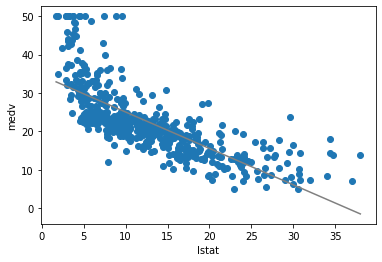

In [45]:
plt.scatter(Boston.lstat, Boston.medv)
X = pd.DataFrame({'lstat':[Boston.lstat.min(), Boston.lstat.max()]})
Y_pred = lm_fit.predict(X)
plt.plot(X, Y_pred, c='gray')
plt.xlabel('lstat')
plt.ylabel('medv')


In [46]:
X

,lstat
0,1.73
1,37.97


In [48]:
print(Boston.lstat.min())
print(Boston.lstat.max())

1.73
37.97


In [49]:
Y_pred

0    32.910255
1    -1.519533
dtype: float64

In [50]:
#Multiple Linear Regression

In [51]:
lm_fit = smf.ols('medv ~ lstat+age', data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.98e-88
Time:                        19:48:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Response인 medv 제외하고 다른 모든 열들을 설명변수로 대입하는 법
columns_selected = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv ~ " + columns_selected
my_formula

'medv ~ Unnamed: 0+age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [54]:
columns_selected

'Unnamed: 0+age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [55]:
lm_fit = smf.ols(formula=my_formula, data=Boston).fit()

In [56]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 03 May 2020   Prob (F-statistic):          6.72e-135
Time:                        19:54:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
lm_fit.resid.describe()

count    5.060000e+02
mean    -2.102841e-15
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

In [59]:
#age도 제외
columns_selected = "+".join(Boston.columns.difference(["medv", "age"]))
my_formula = "medv ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=Boston).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 03 May 2020   Prob (F-statistic):          6.08e-136
Time:                        20:00:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
lm_fit1.resid.describe()

count    5.060000e+02
mean     2.814437e-14
std      4.683835e+00
min     -1.560538e+01
25%     -2.731276e+00
50%     -5.187814e-01
75%      1.760098e+00
max      2.622427e+01
dtype: float64

In [61]:
#Interaction Terms

In [63]:
lm_fit = smf.ols("medv ~ lstat*age", data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.86e-88
Time:                        20:04:32   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
#create test dataset
test = pd.DataFrame({'age':[65.4, 79, 23], 'lstat':[4.8, 10,5]})
test

,age,lstat
0,65.4,4.8
1,79.0,10.0
2,23.0,5.0


In [66]:
lm_fit.predict(exog=test)

0    30.663867
1    25.393622
2    29.589306
dtype: float64

In [72]:
?lm_fit.predict

In [73]:
y_predict = lm_fit.predict(Boston.loc[:,['age', 'lstat', 'rm']])
(Boston.medv - y_predict)[0:5]

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
dtype: float64

In [75]:
Boston.loc[:,['age', 'lstat', 'rm']] #column이 'age', 'lstat', 'rm'에 해당하는 모든 행 출력

,age,lstat,rm
0,65.2,4.98,6.575
1,78.9,9.14,6.421
2,61.1,4.03,7.185
3,45.8,2.94,6.998
4,54.2,5.33,7.147
...,...,...,...
501,69.1,9.67,6.593
502,76.7,9.08,6.120
503,91.0,5.64,6.976
504,89.3,6.48,6.794


In [76]:
?Boston.loc

In [77]:
Boston.shape[0] # 행 개수 

506

In [78]:
Boston.shape[1] #열 개수

15

In [79]:
Boston.index

RangeIndex(start=0, stop=506, step=1)

In [80]:
Boston.rm

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [81]:
lm_fit.resid[:5] #73의 결과와 같다

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
dtype: float64

In [82]:
lm_fit.predict(Boston.loc[:, ['age', 'rm']]) #lstat이 없어서 오류남

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'lstat' is not defined
    medv ~ lstat*age
           ^^^^^

In [83]:
#Non-linear Transformation of predictors

In [84]:
lm_fit2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=Boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 03 May 2020   Prob (F-statistic):          1.56e-112
Time:                        20:33:21   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
np.power(3,3)

27

In [88]:
# Anova test to compare two models

In [89]:
import statsmodels.api as sm

lm_fit = smf.ols('medv ~ lstat', data = Boston).fit()
table = sm.stats.anova_lm(lm_fit, lm_fit2, typ=1)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\chris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\chris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\chris\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
